# 1) Importing the packages

In [51]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.style.use('seaborn')

# 2) Exploring the dataset

In [3]:
df = pd.read_csv('../Datasets/co2.csv', index_col='date', parse_dates=True)
df.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [4]:
df.tail()

,CO2_ppm
date,
2018-05-01,411.24
2018-06-01,410.79
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 1958-03-01 to 2018-09-01
Data columns (total 1 columns):
CO2_ppm    727 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


In [6]:
df.describe()

,CO2_ppm
count,727.000000
mean,353.640702
std,27.443136
min,312.660000
25%,328.555000
50%,351.310000
75%,375.700000
max,411.240000


In [7]:
df.isna().sum()

CO2_ppm    0
dtype: int64

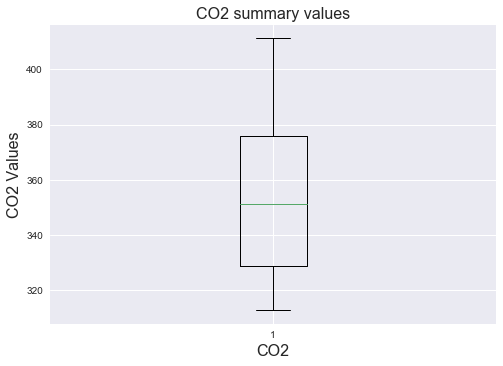

In [52]:
plt.boxplot(data=df, x='CO2_ppm')
plt.xlabel('CO2', fontsize=16)
plt.ylabel('CO2 Values', fontsize=16)
plt.title('CO2 summary values', fontsize=16);

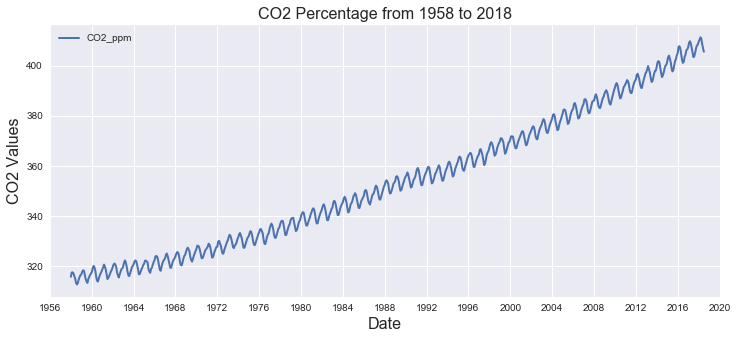

In [53]:
fig, ax = plt.subplots()
df.plot(ax=ax, figsize=(12,5), linewidth=2)
ax.set_xticks([pd.to_datetime(str(year)+'-03-01') for year in list(range(1956,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1956,2021,4))], rotation=0)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('CO2 Values', fontsize=16)
ax.set_title('CO2 Percentage from 1958 to 2018', fontsize=16)
plt.show()

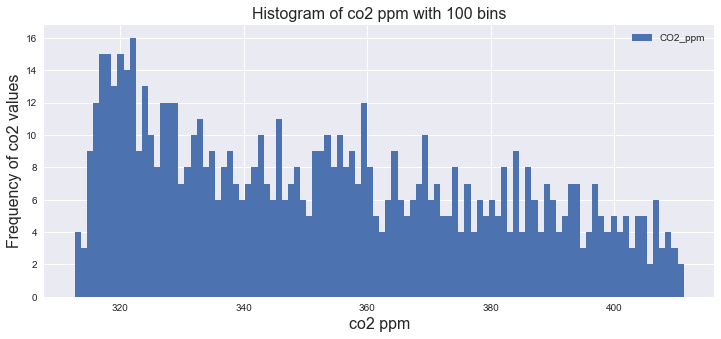

In [54]:
ax2 = df.plot(kind='hist', figsize=(12,5), bins=100)
ax2.set_xlabel('co2 ppm', fontsize=16)
ax2.set_ylabel('Frequency of co2 values', fontsize=16)
ax2.set_title('Histogram of co2 ppm with 100 bins', fontsize=16)
plt.show()

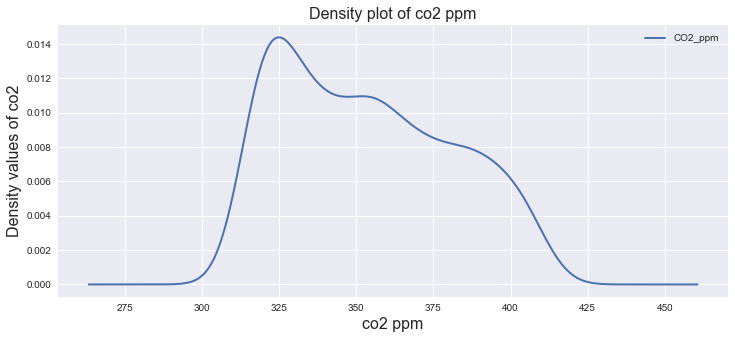

In [55]:
ax3 = df.plot(kind='density', figsize=(12,5), linewidth=2)
ax3.set_xlabel('co2 ppm', fontsize=16)
ax3.set_ylabel('Density values of co2', fontsize=16)
ax3.set_title('Density plot of co2 ppm', fontsize=16)
plt.show()

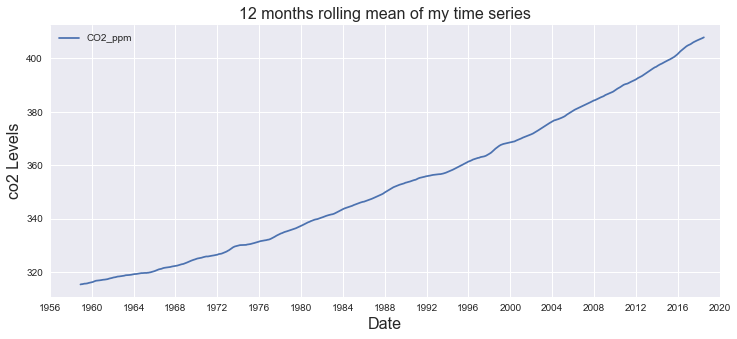

In [56]:
co2_levels_mean = df.rolling(window=12).mean()
ax = co2_levels_mean.plot(figsize=(12,5))
ax.set_xticks([pd.to_datetime(str(year)+'-03-01') for year in list(range(1956,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1956,2021,4))], rotation=0)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("co2 Levels", fontsize=16)
ax.set_title("12 months rolling mean of my time series", fontsize=16)
plt.show()

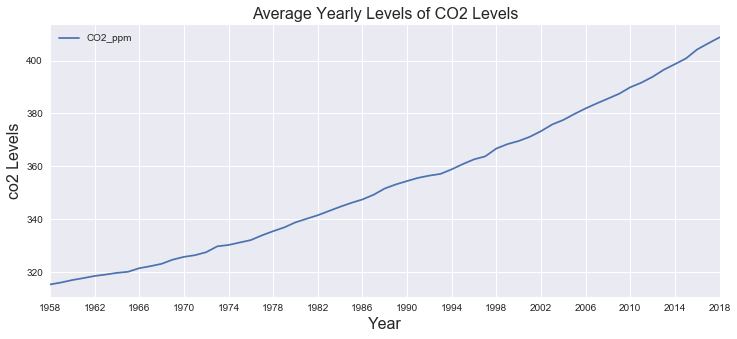

In [57]:
index_year = df.index.year
co2_levels_by_year = df.groupby(index_year).mean()
ax = co2_levels_by_year.plot(figsize=(12,5))
ax.set_xticks([year for year in list(range(1958,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1958,2021,4))])
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("co2 Levels", fontsize=16)
ax.set_title("Average Yearly Levels of CO2 Levels", fontsize=16)
plt.show()

In [14]:
index_year

Int64Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
            ...
            2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=727)

In [15]:
co2_levels_by_year

,CO2_ppm
date,
1958,315.241000
1959,315.974167
1960,316.907500
1961,317.637500
1962,318.450833
...,...
2014,398.647500
2015,400.834167
2016,404.239167


In [16]:
co2_levels_mean[:'1962']

,CO2_ppm
date,
1958-03-01,NaN
1958-04-01,NaN
1958-05-01,NaN
1958-06-01,NaN
1958-07-01,NaN
1958-08-01,NaN
1958-09-01,NaN
1958-10-01,NaN
1958-11-01,NaN


# 3) Autocorrelation

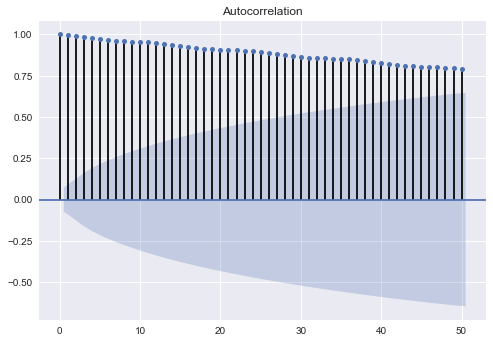

In [58]:
fig = tsaplots.plot_acf(df['CO2_ppm'], lags=50)
plt.show()

# 4) Partial Autocorrelation

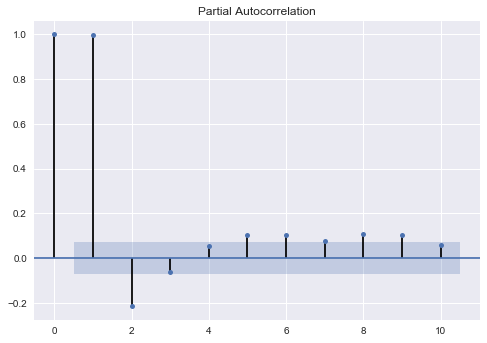

In [59]:
fig = tsaplots.plot_pacf(df['CO2_ppm'], lags=10)
plt.show()

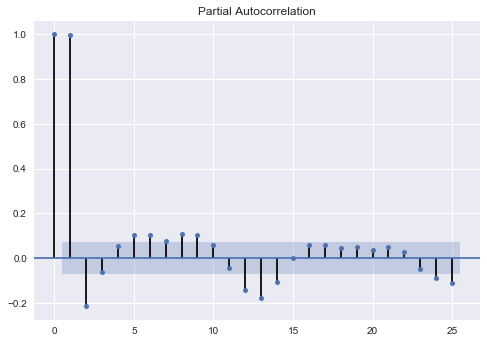

In [60]:
fig = tsaplots.plot_pacf(df['CO2_ppm'], lags=25)
plt.show()

# 5) Seasonality, Trend and Noise

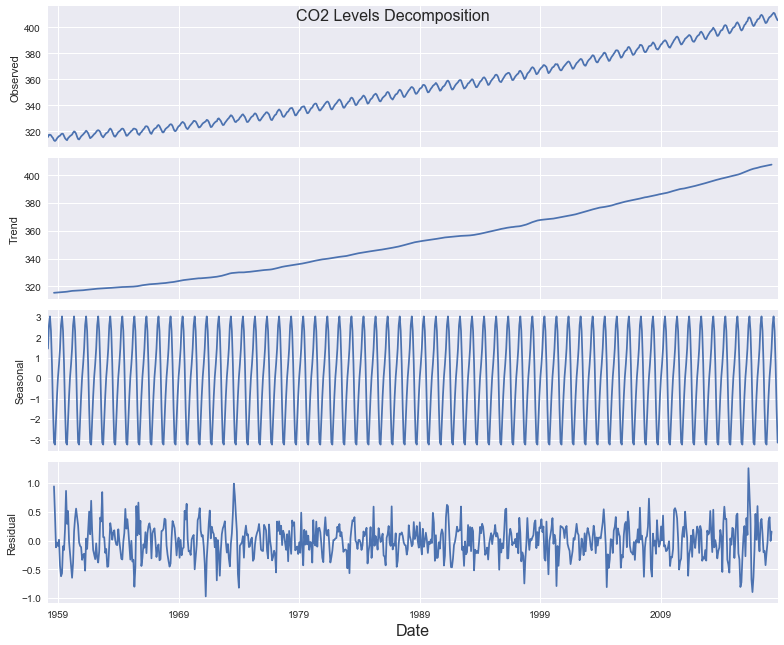

In [61]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df['CO2_ppm'])
fig = decomposition.plot()
plt.xlabel('Date', fontsize=16)
plt.suptitle('CO2 Levels Decomposition', fontsize=16)
plt.show()

# 6) Fitting an ARIMA Model

### Making the time series stationary
- Use the augmente Dicky-Fuller test for trend non_stationarity
- Null Hypothesis is time series is non-stationary 

In [21]:
adfuller_result = adfuller(df.CO2_ppm)
adfuller_result

(4.774866785205458,
 1.0,
 20,
 706,
 {'1%': -3.439646367660705,
  '5%': -2.8656425177031375,
  '10%': -2.5689546724554404},
 494.90714335429107)

- 0th element is test statistics: more positive means more likely to be non-stationary
- 1st element is p-value: if p-value is more than threshold(0.05) -> Fail to reject null hypothesis()
- 4th is the critical test statistics

#### To make the time series stationary you could:
- Take the difference
- Or take the log
- Or take the square root
- Or take the proportional change (df.shift(1)/df)


In [22]:
df_stationary = df.diff().dropna()

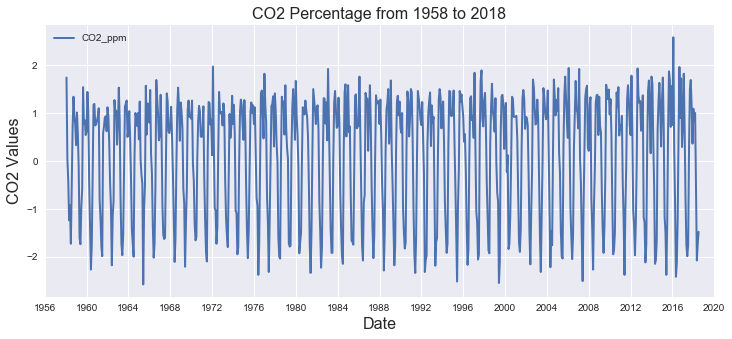

In [62]:
fig, ax = plt.subplots()
df_stationary.plot(ax=ax, figsize=(12,5), linewidth=2)
ax.set_xticks([pd.to_datetime(str(year)+'-03-01') for year in list(range(1956,2021,4))])
ax.set_xticklabels([str(year) for year in list(range(1956,2021,4))], rotation=0)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('CO2 Values', fontsize=16)
ax.set_title('CO2 Percentage from 1958 to 2018', fontsize=16)
plt.show()

In [24]:
adfuller_result_2 = adfuller(df_stationary.CO2_ppm)
adfuller_result_2

(-5.28742563161528,
 5.813789175332047e-06,
 20,
 705,
 {'1%': -3.4396596024765795,
  '5%': -2.86564834926679,
  '10%': -2.568957779286756},
 504.3526488821651)

In [25]:
adfuller_result_2 = adfuller(df_stationary.CO2_ppm)
adfuller_result_2

(-5.28742563161528,
 5.813789175332047e-06,
 20,
 705,
 {'1%': -3.4396596024765795,
  '5%': -2.86564834926679,
  '10%': -2.568957779286756},
 504.3526488821651)

### Creating an ARMA model

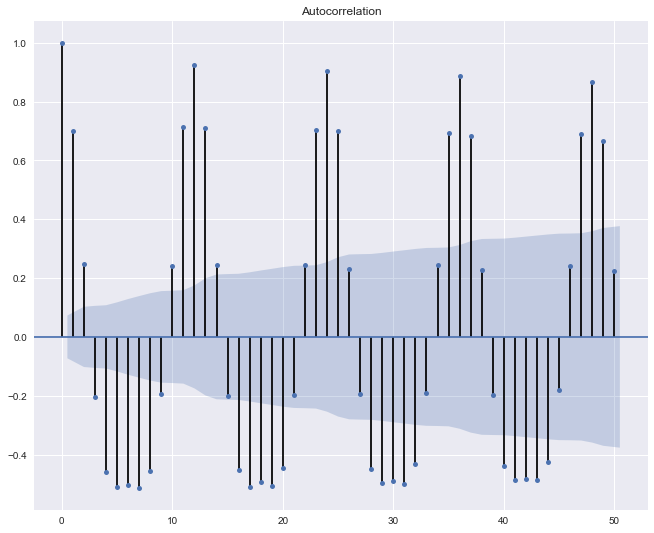

In [63]:
fig = tsaplots.plot_acf(df_stationary['CO2_ppm'], lags=50)
plt.show()

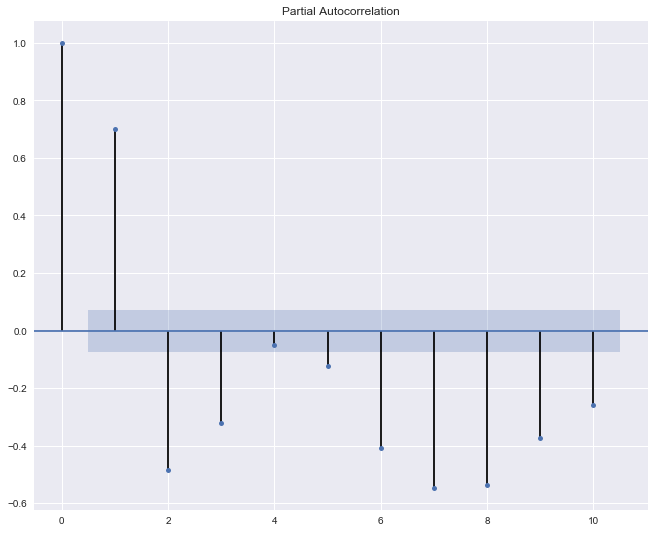

In [64]:
fig = tsaplots.plot_pacf(df_stationary['CO2_ppm'], lags=10)
plt.show()

Since the ACF tails of and PACF cuts off after lag 2, then the model is an autoregressive mode of order 2 AR(2).

In [28]:
model = ARMA(df_stationary, order=(1,0))
results = model.fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                CO2_ppm   No. Observations:                  726
Model:                     ARMA(1, 0)   Log Likelihood                -932.579
Method:                       css-mle   S.D. of innovations              0.874
Date:                Fri, 07 Apr 2023   AIC                           1871.158
Time:                        13:20:41   BIC                           1884.920
Sample:                    04-01-1958   HQIC                          1876.469
                         - 09-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1237      0.109      1.136      0.256      -0.090       0.337
ar.L1.CO2_ppm     0.7033      0.026     26.621      0.000       0.652       0.755
                                    Root

In [30]:
model = ARMA(df_stationary, order=(2,0))
results = model.fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [31]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                CO2_ppm   No. Observations:                  726
Model:                     ARMA(2, 0)   Log Likelihood                -835.145
Method:                       css-mle   S.D. of innovations              0.764
Date:                Fri, 07 Apr 2023   AIC                           1678.290
Time:                        13:20:41   BIC                           1696.640
Sample:                    04-01-1958   HQIC                          1685.372
                         - 09-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1266      0.064      1.972      0.049       0.001       0.252
ar.L1.CO2_ppm     1.0451      0.032     32.171      0.000       0.981       1.109
ar.L2.CO2_ppm    -0.4865      0.033    -

In [32]:
model = ARMA(df_stationary, order=(3,0))
results = model.fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [33]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                CO2_ppm   No. Observations:                  726
Model:                     ARMA(3, 0)   Log Likelihood                -797.008
Method:                       css-mle   S.D. of innovations              0.725
Date:                Fri, 07 Apr 2023   AIC                           1604.015
Time:                        13:20:43   BIC                           1626.953
Sample:                    04-01-1958   HQIC                          1612.867
                         - 09-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1279      0.046      2.765      0.006       0.037       0.219
ar.L1.CO2_ppm     0.8909      0.035     25.257      0.000       0.822       0.960
ar.L2.CO2_ppm    -0.1559      0.048     

### Searching over the best AIC and BIC

In [34]:
order_aic_bic = []
# Loop over AR order
for p in range(10):
    # Loop over MA order
    for q in range(10):
        # Fit model
        try:
            model = ARMA(df_stationary, order=(p,q))
            results = model.fit()
            
            # Add order and scores to list
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: 

In [35]:
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

In [38]:
# Sort by AIC
order_df.sort_values('aic')

,p,q,aic,bic
86,8,6,467.473718,540.874518
97,9,7,474.910521,557.486421
95,9,5,478.857092,552.257892
96,9,6,484.753494,562.741844
65,6,5,490.280899,549.919049
...,...,...,...,...
88,8,8,NaN,NaN
89,8,9,NaN,NaN
94,9,4,NaN,NaN
98,9,8,NaN,NaN


In [39]:
# Sort by BIC
order_df.sort_values('bic')

,p,q,aic,bic
86,8,6,467.473718,540.874518
46,4,6,494.227551,549.278151
65,6,5,490.280899,549.919049
95,9,5,478.857092,552.257892
47,4,7,495.087639,554.725790
...,...,...,...,...
88,8,8,NaN,NaN
89,8,9,NaN,NaN
94,9,4,NaN,NaN
98,9,8,NaN,NaN


### Creating the final model

In [44]:
df_train = df_stationary[:'2014']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 681 entries, 1958-04-01 to 2014-12-01
Data columns (total 1 columns):
CO2_ppm    681 non-null float64
dtypes: float64(1)
memory usage: 10.6 KB


In [43]:
df_test = df_stationary['2015':]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2015-01-01 to 2018-09-01
Data columns (total 1 columns):
CO2_ppm    45 non-null float64
dtypes: float64(1)
memory usage: 720.0 bytes


In [65]:
final_model = SARIMAX(df_train, order=(8,0,6))
final_results = final_model.fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [66]:
print(final_results.summary())

                           Statespace Model Results                           
Dep. Variable:                CO2_ppm   No. Observations:                  681
Model:               SARIMAX(8, 0, 6)   Log Likelihood                -325.321
Date:                Fri, 07 Apr 2023   AIC                            680.642
Time:                        17:40:10   BIC                            748.496
Sample:                    04-01-1958   HQIC                           706.905
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8779      0.073     12.092      0.000       0.736       1.020
ar.L2          0.3096      0.103      3.004      0.003       0.108       0.512
ar.L3         -1.4454      0.077    -18.856      0.0

In [79]:
forecast = final_results.get_prediction(start=-50)

In [80]:
predicted_mean = forecast.predicted_mean
predicted_mean

2010-11-01    0.830397
2010-12-01    1.133930
2011-01-01    1.121453
2011-02-01    0.875676
2011-03-01    1.051585
2011-04-01    0.842276
2011-05-01    0.314096
2011-06-01   -0.841240
2011-07-01   -1.996201
2011-08-01   -2.166911
2011-09-01   -1.484352
2011-10-01    0.104765
2011-11-01    1.013022
2011-12-01    1.451595
2012-01-01    0.916568
2012-02-01    0.774100
2012-03-01    0.640605
2012-04-01    0.835621
2012-05-01    0.304296
2012-06-01   -0.737751
2012-07-01   -1.866893
2012-08-01   -2.197174
2012-09-01   -1.217265
2012-10-01   -0.101176
2012-11-01    1.130719
2012-12-01    1.169536
2013-01-01    0.996176
2013-02-01    0.649087
2013-03-01    0.745709
2013-04-01    0.925402
2013-05-01    0.226950
2013-06-01   -0.636922
2013-07-01   -2.001377
2013-08-01   -2.142163
2013-09-01   -1.379940
2013-10-01    0.066122
2013-11-01    1.041866
2013-12-01    1.323129
2014-01-01    0.847614
2014-02-01    0.629541
2014-03-01    0.773348
2014-04-01    0.903199
2014-05-01    0.490606
2014-06-01 

In [82]:
confidence_intervals = forecast.conf_int()
confidence_intervals

,lower CO2_ppm,upper CO2_ppm
2010-11-01,0.069447,1.591347
2010-12-01,0.372980,1.894880
2011-01-01,0.360503,1.882404
2011-02-01,0.114725,1.636626
2011-03-01,0.290635,1.812536
2011-04-01,0.081325,1.603226
2011-05-01,-0.446854,1.075047
2011-06-01,-1.602190,-0.080290
2011-07-01,-2.757151,-1.235251
2011-08-01,-2.927861,-1.405961


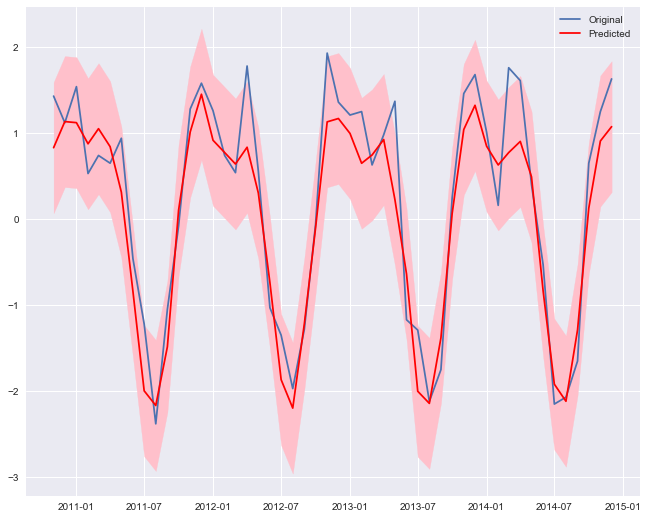

In [93]:
plt.figure()
# Plot prediction
plt.plot(predicted_mean.index, df_stationary['2010-11-01':'2014'])
plt.plot(predicted_mean.index, predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'])
# Shade uncertainty area
plt.fill_between(predicted_mean.index, confidence_intervals['lower CO2_ppm'], confidence_intervals['upper CO2_ppm'], color='pink')
plt.show()

### Future Predictions

In [105]:
f_predictions = final_results.get_forecast(steps=df_test.shape[0])
f_predictions.predicted_mean

2015-01-01    0.704031
2015-02-01    0.665744
2015-03-01    1.056950
2015-04-01    1.098956
2015-05-01    0.620872
2015-06-01   -0.952804
2015-07-01   -1.972580
2015-08-01   -2.360264
2015-09-01   -1.233622
2015-10-01    0.101991
2015-11-01    1.028640
2015-12-01    1.173008
2016-01-01    0.737521
2016-02-01    0.833800
2016-03-01    0.912560
2016-04-01    1.188604
2016-05-01    0.377968
2016-06-01   -0.811567
2016-07-01   -2.021186
2016-08-01   -2.222232
2016-09-01   -1.218693
2016-10-01    0.003783
2016-11-01    1.073562
2016-12-01    1.033017
2017-01-01    0.940901
2017-02-01    0.739081
2017-03-01    1.030373
2017-04-01    1.035603
2017-05-01    0.344883
2017-06-01   -0.803935
2017-07-01   -2.027549
2017-08-01   -2.047027
2017-09-01   -1.329173
2017-10-01    0.100422
2017-11-01    0.895908
2017-12-01    1.128502
2018-01-01    0.926718
2018-02-01    0.801217
2018-03-01    1.056175
2018-04-01    0.899294
2018-05-01    0.385563
2018-06-01   -0.933862
2018-07-01   -1.851342
2018-08-01 

In [104]:
df_test

,CO2_ppm
date,
2015-01-01,1.07
2015-02-01,0.30
2015-03-01,1.26
2015-04-01,1.74
2015-05-01,0.68
2015-06-01,-1.16
2015-07-01,-1.49
2015-08-01,-2.38
2015-09-01,-1.30


In [107]:
f_conf = f_predictions.conf_int()
f_conf

,lower CO2_ppm,upper CO2_ppm
2015-01-01,-0.056920,1.464981
2015-02-01,-0.095681,1.427169
2015-03-01,0.295194,1.818707
2015-04-01,0.336118,1.861794
2015-05-01,-0.143820,1.385564
2015-06-01,-1.725148,-0.180460
2015-07-01,-2.744930,-1.200229
2015-08-01,-3.133147,-1.587382
2015-09-01,-2.032410,-0.434833
2015-10-01,-0.699023,0.903005


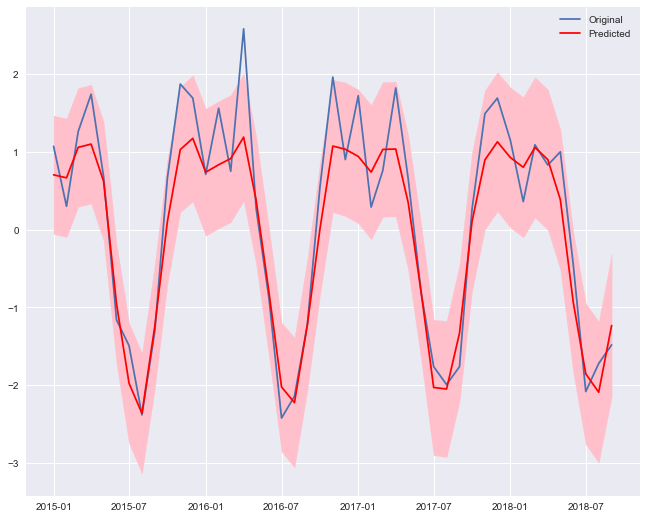

In [108]:
plt.figure()
# Plot prediction
plt.plot(df_test)
plt.plot(df_test.index, f_predictions.predicted_mean.values, color='red', label='forecast')
plt.legend(['Original', 'Predicted'])
# Shade uncertainty area
plt.fill_between(df_test.index, f_conf['lower CO2_ppm'], f_conf['upper CO2_ppm'], color='pink')
plt.show()